<a href="https://colab.research.google.com/github/AlexMachaca/Simulacion-de-Sistemas-Proyecto-Plaza-Vea/blob/main/Simulacion_11_cajas/Simulaci%C3%B3n_con_11_cajas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SIMULACIÓN DE LAS COLAS DEL SUPERMERCADO PLAZA VEA EN TACNA CON 11 CAJAS**

In [ ]:
!pip install simpy distfit numpy pandas

In [ ]:
import simpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from distfit import distfit
from scipy.stats import gamma, expon

**Carga de datos**

In [ ]:
print(">>> Cargando datos de campo...")

# CAJA 1 ---
caja1_inter = [130, 40, 80, 130, 87, 10, 54, 98, 126, 375, 184, 39, 183, 60, 65, 28, 44, 56, 185, 61, 73, 20, 79, 71, 65, 83, 137]
caja1_serv = [142, 97, 260, 202, 205, 189, 251, 649, 605, 591, 255, 164, 198, 99, 110, 92, 186, 198, 222, 116, 140, 202, 259, 322, 268, 315, 280, 212]

# CAJA 2 ---
caja2_inter = [30, 10, 120, 396, 789, 27, 80, 118, 207, 88, 40, 120, 595, 18, 112, 75, 185, 81, 87, 54, 8, 200, 143, 59, 522, 94, 44, 540, 327, 769, 422, 9, 159, 195, 997, 868]
caja2_serv = [225, 570, 837, 833, 568, 266, 372, 378, 357, 231, 290, 340, 558, 384, 475, 445, 478, 472, 510, 670, 704, 776, 735, 715, 1688, 1829, 1990, 2088, 1639, 1636, 1036, 2255, 2671, 2590, 2492, 1544, 856]

# CAJA 3 ---
caja3_inter = [193, 153, 178, 43, 35, 274, 32, 152, 76, 46, 203, 12, 80, 97, 32, 203, 104, 41, 93, 242, 25, 113, 226, 35, 47, 59, 163, 31, 37, 34, 64, 208, 142, 101, 70, 38]
caja3_serv = [325, 247, 161, 182, 218, 258, 65, 75, 136, 106, 184, 145, 287, 321, 321, 337, 166, 120, 264, 357, 291, 333, 251, 89, 139, 145, 212, 75, 97, 99, 94, 191, 288, 346, 335, 320, 409]

# CAJA 4 ---
caja4_inter = [82, 210, 115, 100, 19, 246, 13, 103, 196, 273, 171, 87, 477, 52, 129, 72, 195, 121, 166]
caja4_serv = [437, 693, 580, 608, 682, 757, 602, 727, 985, 931, 800, 696, 706, 418, 465, 542, 597, 591, 594, 521]

inter_all = np.concatenate([caja1_inter, caja2_inter, caja3_inter, caja4_inter])
serv_all  = np.concatenate([caja1_serv, caja2_serv, caja3_serv, caja4_serv])

print(f"Total datos de llegadas: {len(inter_all)}")
print(f"Total datos de servicio: {len(serv_all)}")

>>> Cargando datos de campo...
Total datos de llegadas: 118
Total datos de servicio: 122


**Hallando la distribución**


------------------------------
 1. ANÁLISIS: TIEMPO ENTRE LLEGADAS
------------------------------
-> Distribución detectada: expon
-> Parámetros: (8.0, 141.66101694915255)


<Figure size 800x400 with 0 Axes>

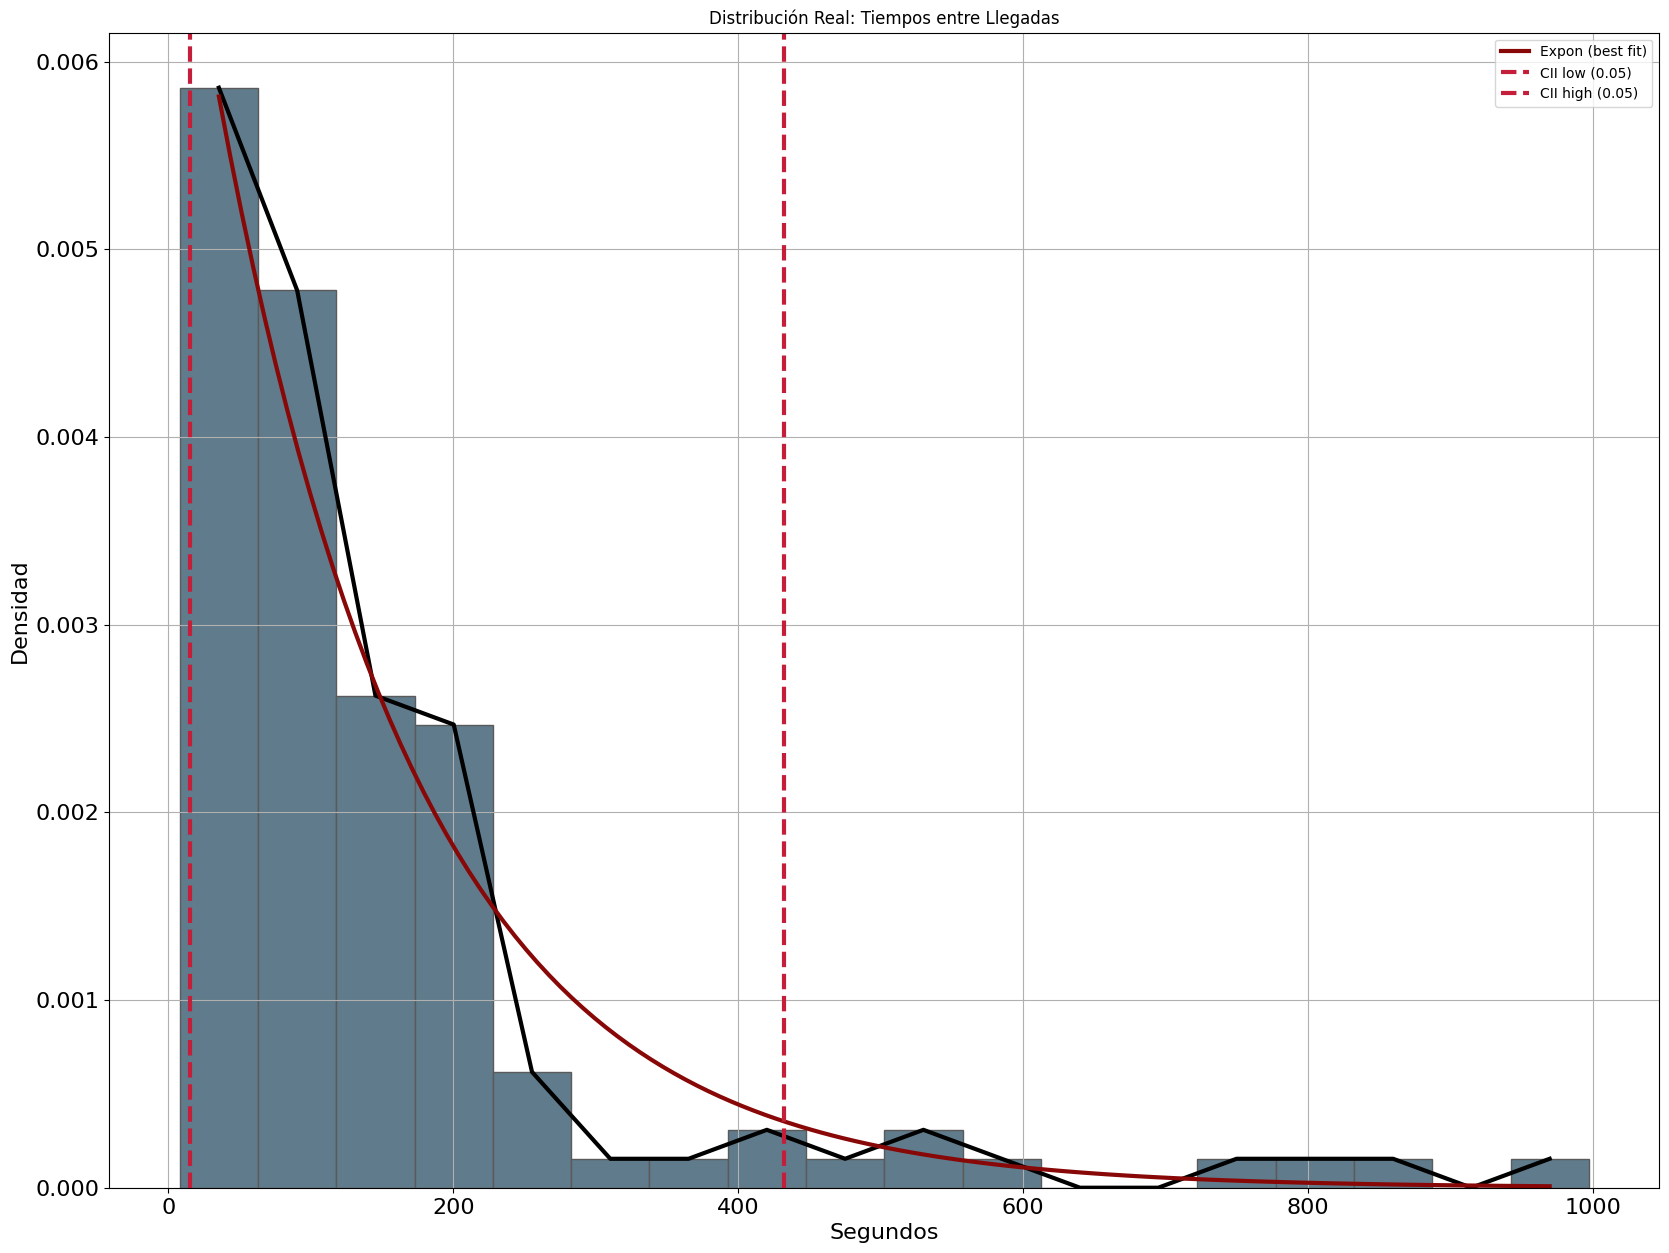


------------------------------
 2. ANÁLISIS: TIEMPO DE SERVICIO
------------------------------
-> Distribución detectada: gamma
-> Parámetros: (np.float64(0.9255725385060899), np.float64(64.99999999999999), np.float64(482.5284908939434))


<Figure size 800x400 with 0 Axes>

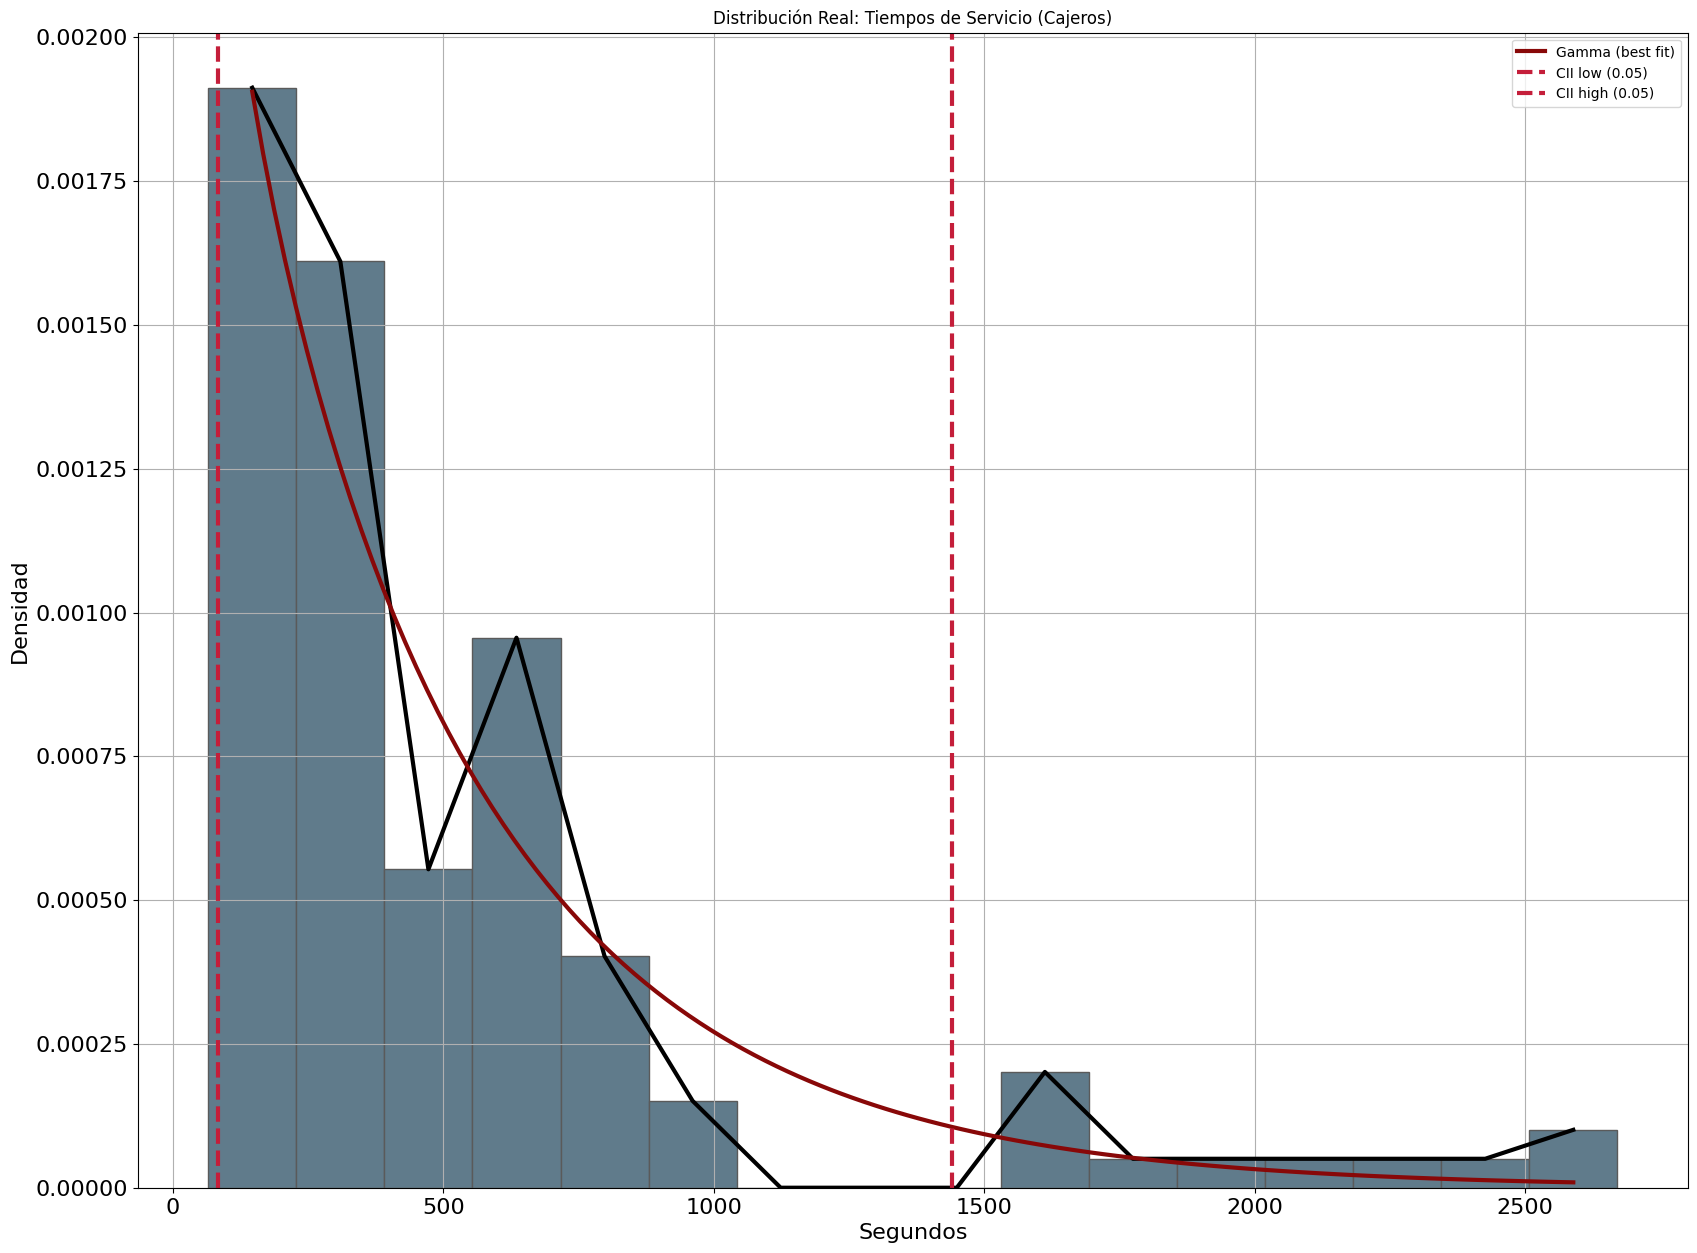

In [ ]:
# LLEGADAS
print(f"\n{'-'*30}")
print(" 1. ANÁLISIS: TIEMPO ENTRE LLEGADAS")
print(f"{'-'*30}")
dist_inter_viz = distfit(distr=['expon', 'lognorm', 'weibull_min'], smooth=None)
dist_inter_viz.fit_transform(inter_all, verbose=0)

print(f"-> Distribución detectada: {dist_inter_viz.model['name']}")
print(f"-> Parámetros: {dist_inter_viz.model['params']}")

plt.figure(figsize=(8,4))
dist_inter_viz.plot()
plt.title("Distribución Real: Tiempos entre Llegadas")
plt.xlabel("Segundos")
plt.ylabel("Densidad")
plt.show()

# SERVICIO
print(f"\n{'-'*30}")
print(" 2. ANÁLISIS: TIEMPO DE SERVICIO")
print(f"{'-'*30}")
dist_serv = distfit(distr=['gamma', 'lognorm', 'weibull_min'], smooth=None)
dist_serv.fit_transform(serv_all, verbose=0)

dist_serv_model = dist_serv.model["model"]

print(f"-> Distribución detectada: {dist_serv.model['name']}")
print(f"-> Parámetros: {dist_serv.model['params']}")

plt.figure(figsize=(8,4))
dist_serv.plot()
plt.title("Distribución Real: Tiempos de Servicio (Cajeros)")
plt.xlabel("Segundos")
plt.ylabel("Densidad")
plt.show()

In [ ]:
todos_inter = caja1_inter + caja2_inter + caja3_inter + caja4_inter
todos_serv = caja1_serv + caja2_serv + caja3_serv + caja4_serv

MEDIA_LLEGADAS_REAL = np.mean(todos_inter)
ALPHA_REAL, LOC_REAL, SCALE_REAL = gamma.fit(todos_serv, floc=0)

print(f"Parámetros ajustados: Media Llegadas={MEDIA_LLEGADAS_REAL:.2f}, Gamma Alpha={ALPHA_REAL:.2f}, Gamma Scale={SCALE_REAL:.2f}")

NUM_CLIENTES = 288
NUM_CAJAS = 11

Parámetros ajustados: Media Llegadas=149.66, Gamma Alpha=1.47, Gamma Scale=358.65


**Modelos de simulación: Plaza Vea en Tacna**

Modelo de línea de espera con múltiples servidores (M/G/s)

1. Tabla de eventos

<table><tr><th> Variable de estado <th> <th> Tiempo en el sistema de cajas (7) <th> <tr><tr><td> Entidades <td><td> Clientes <td><tr><td> Eventos <td><td> Tiempo de llegada (2)  Fin de atención en caja (5) <td><tr><td> Evento secundario <td><td> Inicio de atención (Selección de Caja Libre) (3) <td><tr><tr><td> Actividades <td><td> Tiempo entre llegadas (1)  Tiempo de servicio (4) <td><tr><table>

2. Relaciones lógico-matemáticas

El tiempo entre llegadas (1) sigue una distribución exponencial con media calculada de los datos reales ($\approx 126.5$ seg).El tiempo de servicio (4) sigue una distribución Gamma con parámetros $\alpha$ y $\theta$ obtenidos de tus datos.Selección de Caja: El cliente elige la caja que se desocupa más pronto (min(fin_de_atencion_cajas)).


**Tiempo entre llegadas**

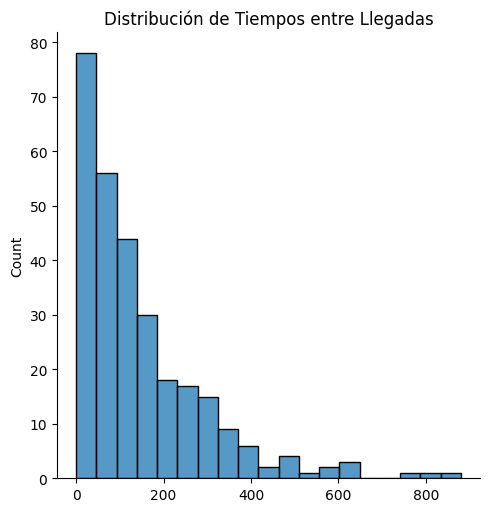

In [ ]:
aleatorios = np.random.rand(NUM_CLIENTES)
tiempo_entre_llegadas = -MEDIA_LLEGADAS_REAL * np.log(1 - aleatorios)

sns.displot(None, x = tiempo_entre_llegadas)
plt.title("Distribución de Tiempos entre Llegadas")
plt.show()

**Tiempo de llegada**

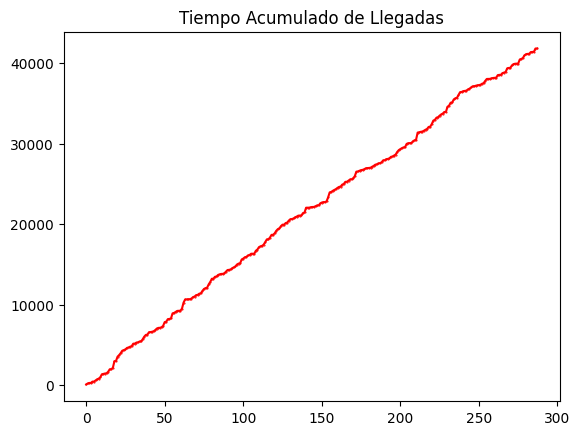

In [ ]:
tiempo_de_llegada = np.cumsum(tiempo_entre_llegadas)
plt.plot(range(len(tiempo_de_llegada)), tiempo_de_llegada, marker=".", color="red", markersize=1)
plt.title("Tiempo Acumulado de Llegadas")
plt.show()

**Tiempo de servicio (Gamma)**

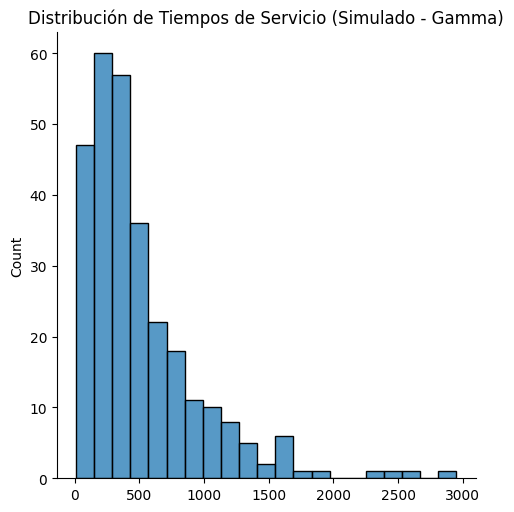

In [ ]:
aleatorios2 = np.random.rand(NUM_CLIENTES)
tiempo_de_servicio = gamma.ppf(aleatorios2, a=ALPHA_REAL, scale=SCALE_REAL)

sns.displot(None, x = tiempo_de_servicio)
plt.title("Distribución de Tiempos de Servicio (Simulado - Gamma)")
plt.show()

**Simulación del proceso**

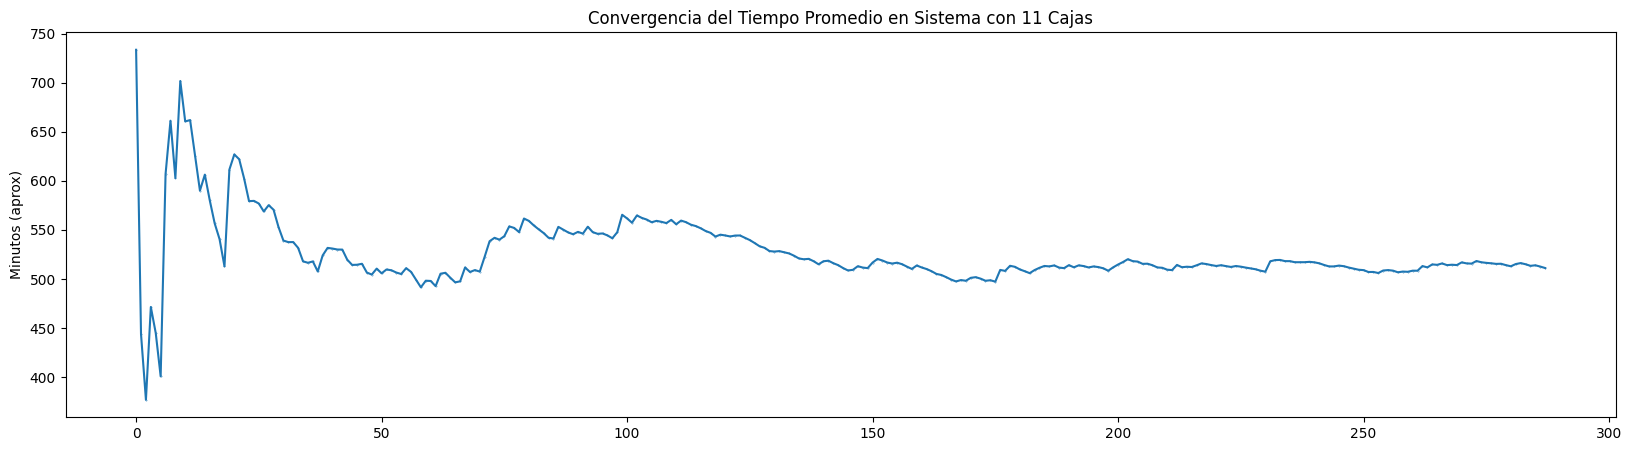

   T. entre llegadas  T. llegada  Caja Asignada  Inicio Atención  T. Servicio  \
0          72.511280   72.511280              1        72.511280   733.488115   
1         126.383239  198.894519              2       198.894519   154.114245   
2          63.325061  262.219581              3       262.219581   243.138233   
3           1.228197  263.447777              4       263.447777   755.050619   
4         165.451956  428.899733              5       428.899733   338.656284   
5           4.628403  433.528136              6       433.528136   180.243640   
6         137.413999  570.942135              7       570.942135  1843.156907   
7         141.138369  712.080504              8       712.080504  1041.632753   
8          88.978186  801.058690              9       801.058690   135.739052   
9         161.022685  962.081375             10       962.081375  1591.376320   

   Fin Atención  T. Total (Sistema)  T. Espera (Cola)  
0    805.999395          733.488115               0.

In [ ]:
inicio_de_atencion = []
fin_de_atencion = []
tiempo_en_atencion = []
tiempo_en_espera = []
caja_asignada = []
tiempo_promedio_en_sistema = []

fin_atencion_cajas = [0] * NUM_CAJAS

suma_tiempos = 0

for cliente in range(NUM_CLIENTES):
    llegada_actual = tiempo_de_llegada[cliente]
    servicio_actual = tiempo_de_servicio[cliente]

    indice_caja = np.argmin(fin_atencion_cajas)
    tiempo_liberacion = fin_atencion_cajas[indice_caja]

    inicio = max(tiempo_liberacion, llegada_actual)
    fin = inicio + servicio_actual

    fin_atencion_cajas[indice_caja] = fin

    inicio_de_atencion.append(inicio)
    fin_de_atencion.append(fin)
    caja_asignada.append(indice_caja + 1)

    t_sistema = fin - llegada_actual
    t_espera = inicio - llegada_actual

    tiempo_en_atencion.append(t_sistema)
    tiempo_en_espera.append(t_espera)

    suma_tiempos += t_sistema
    tiempo_promedio_en_sistema.append(suma_tiempos / (cliente + 1))

plt.figure(figsize=(20,5))
plt.plot(range(NUM_CLIENTES), tiempo_promedio_en_sistema, marker=".", markersize=0.5)
plt.title(f"Convergencia del Tiempo Promedio en Sistema con {NUM_CAJAS} Cajas")
plt.ylabel("Minutos (aprox)")
plt.show()

df = pd.DataFrame(list(zip(
    tiempo_entre_llegadas,
    tiempo_de_llegada,
    caja_asignada,
    inicio_de_atencion,
    tiempo_de_servicio,
    fin_de_atencion,
    tiempo_en_atencion,
    tiempo_en_espera)),
    columns =[
              'T. entre llegadas',
              'T. llegada',
              'Caja Asignada',
              'Inicio Atención',
              'T. Servicio',
              'Fin Atención',
              'T. Total (Sistema)',
              'T. Espera (Cola)'])

print(df.head(10))
print("-" * 50)
print(f"Promedio de espera en cola: {np.mean(tiempo_en_espera)/60:.2f} minutos")
print(f"Promedio total en sistema: {np.mean(tiempo_en_atencion)/60:.2f} minutos")

**Réplicas**

Aquí simulamos 30 veces todo el proceso para obtener una estadística confiable sobre el comportamiento de las 11 cajas.

Ejecutando 30 réplicas...


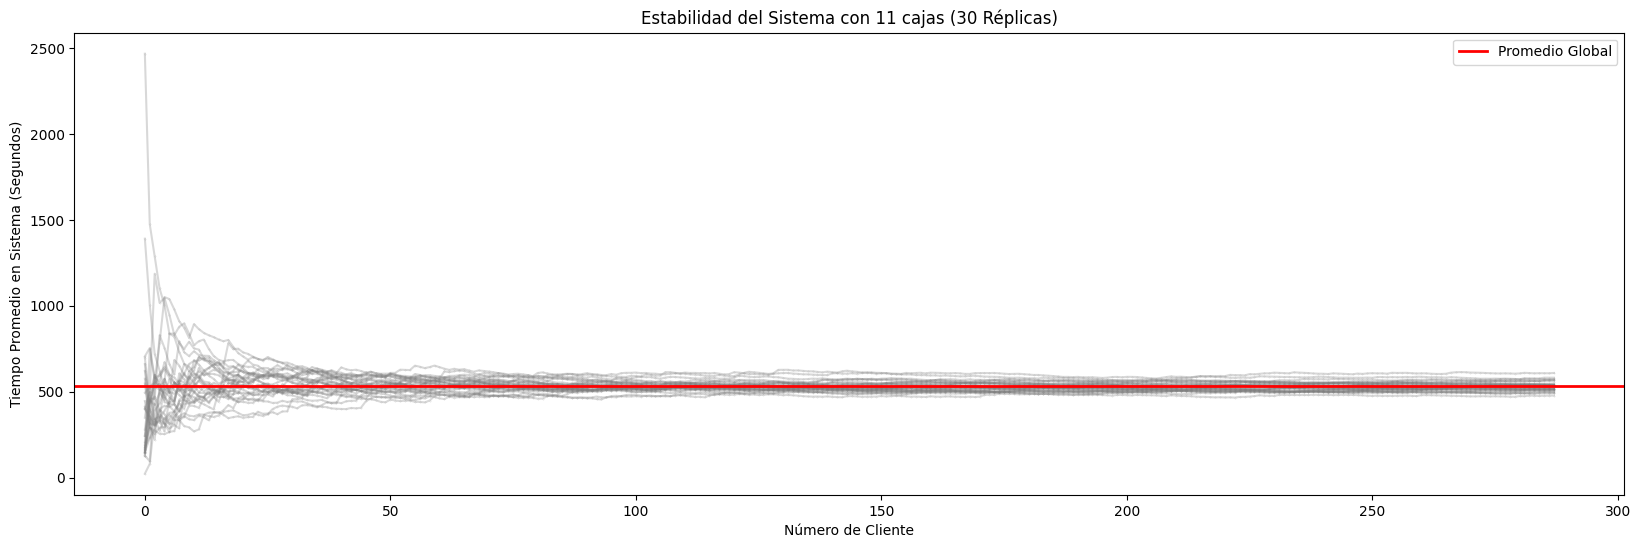


TABLA DE PROMEDIOS POR RÉPLICA
    Nro Réplica  Tiempo Promedio (Segundos)  Tiempo Promedio (Minutos)
0             1                  515.949658                   8.599161
1             2                  523.451497                   8.724192
2             3                  536.273019                   8.937884
3             4                  609.071493                  10.151192
4             5                  511.526158                   8.525436
5             6                  568.377180                   9.472953
6             7                  568.390756                   9.473179
7             8                  513.855238                   8.564254
8             9                  545.447590                   9.090793
9            10                  534.760528                   8.912675
10           11                  559.244747                   9.320746
11           12                  516.524671                   8.608745
12           13                  506.093385  

In [ ]:
tamanho_replica = 288
num_replicas = 30

def simulacion_replica_multicaja():
    aleatorios = np.random.rand(tamanho_replica)
    t_entre = -MEDIA_LLEGADAS_REAL * np.log(1 - aleatorios)
    t_llegada = np.cumsum(t_entre)

    aleatorios2 = np.random.rand(tamanho_replica)
    t_servicio = gamma.ppf(aleatorios2, a=ALPHA_REAL, scale=SCALE_REAL)

    cajas_estado = [0] * NUM_CAJAS

    suma_local = 0
    promedio_movil = []

    for i in range(tamanho_replica):
        idx = np.argmin(cajas_estado)

        inicio = max(cajas_estado[idx], t_llegada[i])
        fin = inicio + t_servicio[i]

        cajas_estado[idx] = fin

        t_sis = fin - t_llegada[i]

        suma_local += t_sis
        promedio_movil.append(suma_local / (i + 1))

    return promedio_movil

replica_tiempo_promedio = []
promedios_finales = []

print(f"Ejecutando {num_replicas} réplicas...")

plt.figure(figsize=(20, 6))
plt.title(f"Estabilidad del Sistema con {NUM_CAJAS} cajas ({num_replicas} Réplicas)")
plt.xlabel("Número de Cliente")
plt.ylabel("Tiempo Promedio en Sistema (Segundos)")

for replica in range(num_replicas):
    res_replica = simulacion_replica_multicaja()
    replica_tiempo_promedio.append(res_replica)

    valor_final = res_replica[-1]
    promedios_finales.append(valor_final)

    plt.plot(range(tamanho_replica), res_replica, marker=".", markersize=0.5, alpha=0.3, color='gray')

plt.axhline(y=np.mean(promedios_finales), color='r', linestyle='-', linewidth=2, label='Promedio Global')
plt.legend()
plt.show()

df_replicas = pd.DataFrame({
    'Nro Réplica': range(1, num_replicas + 1),
    'Tiempo Promedio (Segundos)': promedios_finales,
    'Tiempo Promedio (Minutos)': np.array(promedios_finales) / 60
})

print("\n" + "="*40)
print("TABLA DE PROMEDIOS POR RÉPLICA")
print("="*40)
print(df_replicas)

media_min = np.mean(promedios_finales) / 60
std_min = np.std(promedios_finales) / 60

print("\n" + "="*40)
print(f"RESUMEN ESTADÍSTICO ({NUM_CAJAS} CAJAS)")
print("="*40)
print(f"Media Global de las {num_replicas} réplicas:  {media_min:.4f} minutos")
print(f"Desviación Estándar: {std_min:.4f} minutos")


**Intervalo de confianza**

In [ ]:
datos_minutos = np.array(promedios_finales) / 60

confianza = 0.95
n = len(datos_minutos)
media = np.mean(datos_minutos)
error_est = st.sem(datos_minutos)

intervalo = st.t.interval(confidence=confianza, df=n-1, loc=media, scale=error_est)

print("-" * 50)
print(f"INTERVALO DE CONFIANZA AL {int(confianza*100)}%:")
print(f"Límite Inferior: {intervalo[0]:.4f} minutos")
print(f"Límite Superior: {intervalo[1]:.4f} minutos")
print("-" * 50)

print(f"CONCLUSIÓN: Con un 95% de confianza, el tiempo promedio real que un cliente")
print(f"pasa en el sistema con {NUM_CAJAS} cajas está entre {intervalo[0]:.2f} y {intervalo[1]:.2f} minutos.")

--------------------------------------------------
INTERVALO DE CONFIANZA AL 95%:
Límite Inferior: 8.6854 minutos
Límite Superior: 9.0452 minutos
--------------------------------------------------
CONCLUSIÓN: Con un 95% de confianza, el tiempo promedio real que un cliente
pasa en el sistema con 11 cajas está entre 8.69 y 9.05 minutos.
